## 03 Feature Engineering (v2)

#### Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load processed dataset

In [3]:
input_dir = os.path.join('..', 'data', 'processed')
data_df = pd.read_csv(os.path.join(input_dir, 'processed_data.csv'))
data_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,vert_int,0.001164,4.436797,13.738337,5.483874,8.473223,0.0,49.987032,0.024592,81.676905
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,vert_int,0.002765,2.812857,14.039622,6.153681,8.771999,0.0,50.243436,0.026468,89.320532
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,vert_int,1.237031,1.403520,13.097867,6.950935,9.521604,0.0,51.081573,0.027564,97.147337
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,vert_int,1.300172,2.477033,14.073225,7.199782,9.015558,0.0,49.206599,0.028647,108.684700
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,vert_int,0.684756,5.903936,13.973577,8.799929,5.808104,0.0,41.204845,0.029137,108.551083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755


In [18]:
is_after_2010 = data_df['year'] >= 2010  #inclusive
data_after_2010_df = data_df[is_after_2010]
data_after_2010_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,vert_int,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,vert_int,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,vert_int,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,vert_int,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,vert_int,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,other_wires,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755


In [6]:
data_after_2010_df.columns

Index(['respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission', 'housing_units',
       'income', 'asset_value_distribution', 'asset_value_hydro',
       'asset_value_nuclear', 'asset_value_other', 'asset_value_other_fossil',
       'asset_value_renewables', 'asset_value_steam',
       'asset_value_transmission', 'earnings_value_distribution',
       'earnings_value_hydro', 'earnings_value_nuclear',
       'earnings_value_other', 'earnings_value_other_fossil',

In [19]:
data_after_2010_df['row_id'] = data_after_2010_df['respondent_id']*10000 + data_after_2010_df['year']
data_after_2010_df

<ipython-input-19-c9ff7db9c593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2010_df['row_id'] = data_after_2010_df['respondent_id']*10000 + data_after_2010_df['year']


,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374,4282018.0
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755,4282019.0


#### Create target variable

8 year timeframe: 2012 to 2020 (because calculatinng average change in residential price in a 3-year timeframe) 

2012: ((2012 - 2011)/(2011)) + ((2011 - 2010)/(2010))

TODO: add 2 more columns (prev_year, prev_2years)

In [24]:
# Target variable
normalized_expenditure = data_after_2010_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
normalized_expenditure


,respondent_id,year,normalized_expenditure
0,2.0,2010,111.838989
1,2.0,2011,114.943218
2,2.0,2012,117.445000
3,2.0,2013,115.989436
4,2.0,2014,117.954902
...,...,...,...
1304,428.0,2016,111.441490
1305,428.0,2017,106.074202
1306,428.0,2018,113.902374
1307,428.0,2019,109.822755


In [27]:
# orders['Lag'] = orders['total_order_cost'].shift(1, fill_value = 0)

normalized_expenditure['prev_yr_exp'] = normalized_expenditure['normalized_expenditure'].shift(1, fill_value=0)
normalized_expenditure['prev_2yrs_exp'] = normalized_expenditure['normalized_expenditure'].shift(2, fill_value=0)
normalized_expenditure.head(20)

,respondent_id,year,normalized_expenditure,prev_yr_exp,prev_2yrs_exp
0,2.0,2010,111.838989,0.000000,0.000000
1,2.0,2011,114.943218,111.838989,0.000000
2,2.0,2012,117.445000,114.943218,111.838989
3,2.0,2013,115.989436,117.445000,114.943218
4,2.0,2014,117.954902,115.989436,117.445000
5,2.0,2015,122.034790,117.954902,115.989436
6,2.0,2016,126.580203,122.034790,117.954902
7,2.0,2017,133.721222,126.580203,122.034790
8,2.0,2018,125.370902,133.721222,126.580203
9,2.0,2019,134.069903,125.370902,133.721222


In [35]:
not_2010 = (normalized_expenditure['year'] != 2010)
not_2011 = (normalized_expenditure['year'] != 2011)
normalized_expenditure = normalized_expenditure[not_2010]
normalized_expenditure = normalized_expenditure[not_2011]
normalized_expenditure.head(20)

,respondent_id,year,normalized_expenditure,prev_yr_exp,prev_2yrs_exp
2,2.0,2012,117.445000,114.943218,111.838989
3,2.0,2013,115.989436,117.445000,114.943218
4,2.0,2014,117.954902,115.989436,117.445000
5,2.0,2015,122.034790,117.954902,115.989436
6,2.0,2016,126.580203,122.034790,117.954902
7,2.0,2017,133.721222,126.580203,122.034790
8,2.0,2018,125.370902,133.721222,126.580203
9,2.0,2019,134.069903,125.370902,133.721222
10,2.0,2020,135.056713,134.069903,125.370902
13,3.0,2012,119.292404,120.987794,106.946635


In [50]:
## Target variable: 
normalized_expenditure['av_price_change'] = \
    (normalized_expenditure['normalized_expenditure'] - normalized_expenditure['prev_yr_exp'])/(normalized_expenditure['prev_yr_exp']) + \
    (normalized_expenditure['prev_yr_exp'] - normalized_expenditure['prev_2yrs_exp'])/(normalized_expenditure['prev_2yrs_exp'])
normalized_expenditure

,respondent_id,year,normalized_expenditure,prev_yr_exp,prev_2yrs_exp,av_price_change
2,2.0,2012,117.445000,114.943218,111.838989,0.049522
3,2.0,2013,115.989436,117.445000,114.943218,0.009372
4,2.0,2014,117.954902,115.989436,117.445000,0.004552
5,2.0,2015,122.034790,117.954902,115.989436,0.051534
6,2.0,2016,126.580203,122.034790,117.954902,0.071835
...,...,...,...,...,...,...
1304,428.0,2016,111.441490,117.336134,128.591665,-0.137766
1305,428.0,2017,106.074202,111.441490,117.336134,-0.098400
1306,428.0,2018,113.902374,106.074202,111.441490,0.025637
1307,428.0,2019,109.822755,113.902374,106.074202,0.037982


In [54]:
target = normalized_expenditure['av_price_change'].reset_index(drop=True)
# target = pivot_df[2020].reset_index(drop=True)
target

0       0.049522
1       0.009372
2       0.004552
3       0.051534
4       0.071835
          ...   
1066   -0.137766
1067   -0.098400
1068    0.025637
1069    0.037982
1070   -0.043429
Name: av_price_change, Length: 1071, dtype: float64

In [84]:
# (normalized_expenditure[normalized_expenditure['year'] == 2020])

In [16]:
# # Target variable
# normalized_expenditure = data_df.reset_index()[['respondent_id', 'year', 'normalized_expenditure']]
# normalized_expenditure

In [13]:
# pivot_df = normalized_expenditure.pivot_table(
#     index='respondent_id', 
#     columns='year', 
#     aggfunc='first',
#     values='normalized_expenditure')
# pivot_df

In [14]:
# CAGR:
#t = 10
# pivot_df['normalized_expenditure_cagr'] = (pivot_df[2020]/pivot_df[2010])**0.1 - 1
# pivot_df

In [51]:
# pivot_df['percent_change_expenditure']= (((pivot_df[2020]-pivot_df[2011])/pivot_df[2011])\
#     +((pivot_df[2019]-pivot_df[2010])/pivot_df[2010]))/2
# pivot_df

In [52]:
# target = pivot_df['normalized_expenditure_cagr'].reset_index(drop=True)
# # target = pivot_df[2020].reset_index(drop=True)
# target

In [55]:
data_after_2010_df.head()

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450,0.033783,111.838989,22010.0
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937,0.031261,114.943218,22011.0
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0


#### Prepare DataFrames for Investments

In [127]:
investment_column_names = ['row_id', 'respondent_id', 'year', 'investment_value_distribution',
       'investment_value_hydro', 'investment_value_nuclear',
       'investment_value_other', 'investment_value_other_fossil',
       'investment_value_renewables', 'investment_value_steam',
       'investment_value_transmission', 'sales']

In [128]:
data_after_2012_df = data_after_2010_df[data_after_2010_df['year'] >= 2012]
data_after_2012_df

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam,energy_burden,normalized_expenditure,row_id
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328,0.029887,117.445000,22012.0
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607,0.028994,115.989436,22013.0
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499,0.030413,117.954902,22014.0
10,2.0,2015,260.792793,6.907006,70.938622,206.985392,31.752714,130.317803,138.295142,106.311393,...,0.102664,3.744972,14.281688,9.683409,6.261238,0.0,33.750885,0.029118,122.034790,22015.0
11,2.0,2016,225.182664,6.079789,97.307301,216.554775,31.963499,133.306707,128.914520,109.206112,...,0.108678,3.200018,13.687256,11.026643,6.946212,0.0,32.354126,0.029473,126.580203,22016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,...,0.000000,0.000000,0.000000,0.000004,0.818070,0.0,0.254507,0.018758,111.441490,4282016.0
1900,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,...,0.000000,0.000000,0.000000,0.000003,0.788461,0.0,0.349109,0.015613,106.074202,4282017.0
1901,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.000000,0.017386,113.902374,4282018.0
1902,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.000000,0.016126,109.822755,4282019.0


In [129]:
investment_column_names

['row_id',
 'respondent_id',
 'year',
 'investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission',
 'sales']

In [130]:
investments_sales_df = data_after_2012_df[investment_column_names]
investments_sales_df

,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales
7,22012.0,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0
8,22013.0,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0
9,22014.0,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0
10,22015.0,2.0,2015,301021134.0,13309612.0,100216464.0,503968315.0,0.0,0.0,740742607.0,225559913.0,18082378.0
11,22016.0,2.0,2016,346170310.0,12592555.0,94585351.0,340433373.0,0.0,0.0,766793466.0,168478225.0,18342899.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0
1900,4282017.0,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0
1901,4282018.0,428.0,2018,9187887.0,0.0,0.0,556677.0,0.0,0.0,0.0,1309415.0,571120.0
1902,4282019.0,428.0,2019,17714940.0,0.0,0.0,133071.0,0.0,0.0,0.0,9837046.0,550617.0


In [131]:
investment_column_names.remove('respondent_id')
investment_column_names.remove('year')
investment_column_names.remove('row_id')
investment_column_names

['investment_value_distribution',
 'investment_value_hydro',
 'investment_value_nuclear',
 'investment_value_other',
 'investment_value_other_fossil',
 'investment_value_renewables',
 'investment_value_steam',
 'investment_value_transmission',
 'sales']

In [132]:
investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names].sum(axis=1)
investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']
investments_sales_df

<ipython-input-132-dca9ea1f1a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['sum_investments'] = investments_sales_df[investment_column_names].sum(axis=1)
<ipython-input-132-dca9ea1f1a43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investments_sales_df['sum_investments_generation'] = investments_sales_df['sum_investments'] - investments_sales_df['investment_value_transmission'] - investments_sales_df['investment_value_distribution']


,row_id,respondent_id,year,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission,sales,sum_investments,sum_investments_generation
7,22012.0,2.0,2012,258338498.0,14765465.0,58458982.0,157382446.0,0.0,0.0,54826093.0,153362827.0,17612420.0,7.147467e+08,3.030454e+08
8,22013.0,2.0,2013,287329351.0,26477815.0,50928276.0,256594847.0,0.0,0.0,72715405.0,176758705.0,17919762.0,8.887242e+08,4.246361e+08
9,22014.0,2.0,2014,328096305.0,39142268.0,31874019.0,148174915.0,0.0,0.0,318747804.0,315617541.0,18726485.0,1.200379e+09,5.566655e+08
10,22015.0,2.0,2015,301021134.0,13309612.0,100216464.0,503968315.0,0.0,0.0,740742607.0,225559913.0,18082378.0,1.902900e+09,1.376319e+09
11,22016.0,2.0,2016,346170310.0,12592555.0,94585351.0,340433373.0,0.0,0.0,766793466.0,168478225.0,18342899.0,1.747396e+09,1.232748e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,4907945.0,0.0,0.0,278250.0,0.0,0.0,0.0,3297710.0,551190.0,9.035095e+06,8.294400e+05
1900,4282017.0,428.0,2017,9968608.0,0.0,0.0,234993.0,0.0,0.0,0.0,3240558.0,525781.0,1.396994e+07,7.607740e+05
1901,4282018.0,428.0,2018,9187887.0,0.0,0.0,556677.0,0.0,0.0,0.0,1309415.0,571120.0,1.162510e+07,1.127797e+06
1902,4282019.0,428.0,2019,17714940.0,0.0,0.0,133071.0,0.0,0.0,0.0,9837046.0,550617.0,2.823567e+07,6.836880e+05


In [119]:
# Create a DataFranme of utility investments

# sum_investments_sales_df = data_after_2010_df[investment_column_names].groupby(by=["respondent_id"]).sum()
# investment_column_names.remove('respondent_id')
# sum_investments_sales_df

In [120]:
# sum_investments_sales_df['sum_investments'] = sum_investments_sales_df[investment_column_names].sum(axis=1)
# sum_investments_sales_df['sum_investments_generation'] = sum_investments_sales_df['sum_investments'] - sum_investments_sales_df['investment_value_transmission'] - sum_investments_sales_df['investment_value_distribution']
# sum_investments_sales_df

#### Prepare DataFrames for Expenditures

In [133]:
expenditure_column_names = ['row_id', 'respondent_id', 'year', 'expenditure_gas',
       'expenditure_other fuel', 'expenditure_adjustment',
       'expenditure_distribution', 'expenditure_hydro', 'expenditure_nuclear',
       'expenditure_other', 'expenditure_other_fossil',
       'expenditure_purchased_power', 'expenditure_renewables',
       'expenditure_steam', 'expenditure_transmission']

In [134]:
expenditures_df = data_after_2012_df[expenditure_column_names]
expenditures_df

,row_id,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
7,22012.0,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08
8,22013.0,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08
9,22014.0,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08
10,22015.0,2.0,2015,4.294945e+08,1.040343e+07,1.128197e+08,3.291863e+08,5.049901e+07,2.072554e+08,2.199424e+08,1.690759e+08,1.412469e+08,0.0,8.009460e+08,1.757074e+08
11,22016.0,2.0,2016,3.734744e+08,9.222298e+06,1.558516e+08,3.468435e+08,5.119413e+07,2.135098e+08,2.064751e+08,1.749093e+08,1.386518e+08,0.0,8.471874e+08,1.872254e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06
1900,4282017.0,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06
1901,4282018.0,428.0,2018,2.382207e+07,3.141398e+07,-3.222104e+06,1.582111e+07,0.000000e+00,0.000000e+00,7.660669e+06,0.000000e+00,3.629997e+07,0.0,0.000000e+00,8.492351e+06
1902,4282019.0,428.0,2019,2.146860e+07,2.609341e+07,-7.324975e+05,1.655766e+07,0.000000e+00,0.000000e+00,4.963617e+06,0.000000e+00,3.029142e+07,0.0,0.000000e+00,9.404794e+06


In [136]:
expenditure_column_names.remove('respondent_id')
expenditure_column_names.remove('year')
expenditure_column_names.remove('row_id')
expenditure_column_names

['expenditure_gas',
 'expenditure_other fuel',
 'expenditure_adjustment',
 'expenditure_distribution',
 'expenditure_hydro',
 'expenditure_nuclear',
 'expenditure_other',
 'expenditure_other_fossil',
 'expenditure_purchased_power',
 'expenditure_renewables',
 'expenditure_steam',
 'expenditure_transmission']

In [142]:
expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names].sum(axis=1)
expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']
expenditures_df

<ipython-input-142-1cf54224953d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['sum_expenditures'] = expenditures_df[expenditure_column_names].sum(axis=1)
<ipython-input-142-1cf54224953d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['sum_expenditures_generation'] = expenditures_df['sum_expenditures'] - expenditures_df['expenditure_transmission'] - expenditures_df['expenditure_distribution']


,row_id,respondent_id,year,expenditure_gas,expenditure_other fuel,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission,sum_expenditures,sum_expenditures_generation
7,22012.0,2.0,2012,4.094341e+08,1.088067e+07,1.004088e+08,3.040825e+08,4.443907e+07,1.825707e+08,2.134245e+08,1.757379e+08,1.026648e+08,0.0,7.943939e+08,1.507688e+08,2.488806e+09,2.033954e+09
8,22013.0,2.0,2013,4.986984e+08,1.238707e+07,7.466188e+07,3.095634e+08,4.409042e+07,1.837882e+08,2.172177e+08,1.876388e+08,8.917199e+07,0.0,8.191430e+08,1.532276e+08,2.589588e+09,2.126797e+09
9,22014.0,2.0,2014,5.264963e+08,1.464226e+07,3.740197e+07,3.262710e+08,4.810755e+07,1.918255e+08,2.355937e+08,2.017962e+08,1.505080e+08,0.0,8.451021e+08,1.722740e+08,2.750019e+09,2.251474e+09
10,22015.0,2.0,2015,4.294945e+08,1.040343e+07,1.128197e+08,3.291863e+08,5.049901e+07,2.072554e+08,2.199424e+08,1.690759e+08,1.412469e+08,0.0,8.009460e+08,1.757074e+08,2.646577e+09,2.141683e+09
11,22016.0,2.0,2016,3.734744e+08,9.222298e+06,1.558516e+08,3.468435e+08,5.119413e+07,2.135098e+08,2.064751e+08,1.749093e+08,1.386518e+08,0.0,8.471874e+08,1.872254e+08,2.704545e+09,2.170476e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,8.508476e+06,2.201037e+07,-8.447606e+06,1.470672e+07,0.000000e+00,0.000000e+00,1.299130e+07,0.000000e+00,3.410134e+07,0.0,0.000000e+00,8.073650e+06,9.194424e+07,6.916387e+07
1900,4282017.0,428.0,2017,1.020631e+07,2.426669e+07,-1.218458e+07,1.496933e+07,0.000000e+00,0.000000e+00,1.506321e+07,0.000000e+00,2.981970e+07,0.0,0.000000e+00,8.104139e+06,9.024480e+07,6.717133e+07
1901,4282018.0,428.0,2018,2.382207e+07,3.141398e+07,-3.222104e+06,1.582111e+07,0.000000e+00,0.000000e+00,7.660669e+06,0.000000e+00,3.629997e+07,0.0,0.000000e+00,8.492351e+06,1.202880e+08,9.597458e+07
1902,4282019.0,428.0,2019,2.146860e+07,2.609341e+07,-7.324975e+05,1.655766e+07,0.000000e+00,0.000000e+00,4.963617e+06,0.000000e+00,3.029142e+07,0.0,0.000000e+00,9.404794e+06,1.080470e+08,8.208455e+07


In [139]:
# sum_expenditures_df = data_after_2010_df[expenditure_column_names].groupby(by=["respondent_id"]).sum()
# expenditure_column_names = expenditure_column_names.remove('respondent_id')
# sum_expenditures_df

In [140]:
# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
# sum_expenditures_df['sum_expenditures'] = sum_expenditures_df.sum(axis=1)
# sum_expenditures_df

#### Prepare DataFrames for Generation Mix

In [179]:
gen_column_names = ['row_id',
                    'respondent_id',
                    'year',
                    'generation_ee_dr', 
                    'generation_hydro', 
                    'generation_nuclear', 
                    'generation_other_fossil', 
                    'generation_steam', 
                    'generation_purchased_power', 
                    'generation_renewables_and_storage']

In [180]:
gen_mwh_df = data_after_2012_df[gen_column_names]
gen_mwh_df

,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0
10,22015.0,2.0,2015,0.102664,3.744972,14.281688,9.683409,33.750885,6.261238,0.0
11,22016.0,2.0,2016,0.108678,3.200018,13.687256,11.026643,32.354126,6.946212,0.0
...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0
1901,4282018.0,428.0,2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.846027,0.0
1902,4282019.0,428.0,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.823920,0.0


In [181]:
gen_column_names.remove('respondent_id')
gen_column_names.remove('year')
gen_column_names.remove('row_id')
gen_column_names

['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_purchased_power',
 'generation_renewables_and_storage']

In [186]:
gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names].sum(axis=1)
gen_mwh_df

<ipython-input-186-4d10735c7cf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_total_generation'] = gen_mwh_df[gen_column_names].sum(axis=1)


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196
10,22015.0,2.0,2015,0.102664,3.744972,14.281688,9.683409,33.750885,6.261238,0.0,67.824856,61.563618
11,22016.0,2.0,2016,0.108678,3.200018,13.687256,11.026643,32.354126,6.946212,0.0,67.322933,60.376721
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112
1901,4282018.0,428.0,2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.846027,0.000000
1902,4282019.0,428.0,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.823920,0.000000


In [187]:
gen_column_names_wo_purchased = ['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_renewables_and_storage']
gen_column_names_wo_purchased

['generation_ee_dr',
 'generation_hydro',
 'generation_nuclear',
 'generation_other_fossil',
 'generation_steam',
 'generation_renewables_and_storage']

In [188]:
gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df[gen_column_names_wo_purchased].sum(axis=1)
gen_mwh_df

<ipython-input-188-41ed83775fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df[gen_column_names_wo_purchased].sum(axis=1)


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196
10,22015.0,2.0,2015,0.102664,3.744972,14.281688,9.683409,33.750885,6.261238,0.0,67.824856,61.563618
11,22016.0,2.0,2016,0.108678,3.200018,13.687256,11.026643,32.354126,6.946212,0.0,67.322933,60.376721
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112
1901,4282018.0,428.0,2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.846027,0.000000
1902,4282019.0,428.0,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.823920,0.000000


In [189]:
gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']
gen_mwh_df

<ipython-input-189-7ffdd628056c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
<ipython-input-189-7ffdd628056c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']


,row_id,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
7,22012.0,2.0,2012,0.070519,2.660740,14.762977,10.724467,33.224328,5.435726,0.0,66.878757,61.443031,43.948795,17.423717
8,22013.0,2.0,2013,0.085471,5.624866,14.098022,10.739554,35.701607,4.010261,0.0,70.259781,66.249520,46.441161,19.722888
9,22014.0,2.0,2014,0.096536,3.892956,14.505389,10.738816,35.361499,6.554533,0.0,71.149729,64.595196,46.100315,18.398345
10,22015.0,2.0,2015,0.102664,3.744972,14.281688,9.683409,33.750885,6.261238,0.0,67.824856,61.563618,43.434294,18.026660
11,22016.0,2.0,2016,0.108678,3.200018,13.687256,11.026643,32.354126,6.946212,0.0,67.322933,60.376721,43.380769,16.887274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,0.000000,0.000000,0.000000,0.000004,0.254507,0.818070,0.0,1.072581,0.254511,0.254511,0.000000
1900,4282017.0,428.0,2017,0.000000,0.000000,0.000000,0.000003,0.349109,0.788461,0.0,1.137573,0.349112,0.349112,0.000000
1901,4282018.0,428.0,2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.846027,0.0,0.846027,0.000000,0.000000,0.000000
1902,4282019.0,428.0,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.823920,0.0,0.823920,0.000000,0.000000,0.000000


In [18]:
# gen_mwh_df = data_after_2010_df[gen_column_names].groupby(by=['respondent_id']).sum().reset_index()
# gen_mwh_df['sum_total_generation'] = gen_mwh_df.drop('respondent_id', axis=1).sum(axis=1)
# gen_mwh_df['sum_generation_wo_purchased'] = gen_mwh_df.drop(['respondent_id','sum_total_generation', 'generation_purchased_power'], axis=1).sum(axis=1)
# gen_mwh_df['sum_fossil_generation'] = gen_mwh_df['generation_steam'] + gen_mwh_df['generation_other_fossil']
# gen_mwh_df['sum_clean_generation'] = gen_mwh_df['generation_hydro'] + gen_mwh_df['generation_nuclear'] + gen_mwh_df['generation_renewables_and_storage']
# gen_mwh_df.head()

,respondent_id,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_steam,generation_purchased_power,generation_renewables_and_storage,sum_total_generation,sum_generation_wo_purchased,sum_fossil_generation,sum_clean_generation
0,2.0,1.573564,44.440870,156.718165,121.418686,367.572053,69.316441,0.104373,761.144152,691.827711,488.990739,201.263408
1,3.0,0.154320,1.745414,0.000000,0.004462,0.000000,2.970867,0.000000,4.875063,1.904196,0.004462,1.745414
2,6.0,2.301923,6.638255,0.000000,33.836289,226.739094,181.360370,-0.000532,450.875398,269.515028,260.575383,6.637723
3,7.0,37.279921,0.000000,101.779936,78.367715,103.697013,81.993071,3.871580,406.989237,324.996166,182.064728,105.651516
4,8.0,7.991414,1.505050,152.442479,55.169604,69.531089,69.950383,0.000000,356.590018,286.639635,124.700692,153.947529


#### Prepare DataFrames for Bills

In [193]:
bill_column_names = ['row_id','respondent_id', 'year', 'bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']

In [194]:
sum_bills_df = data_after_2012_df[bill_column_names]
sum_bills_df

,row_id,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission
7,22012.0,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797
8,22013.0,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614
9,22014.0,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163
10,22015.0,2.0,2015,260.792793,6.907006,70.938622,206.985392,31.752714,130.317803,138.295142,106.311393,88.813071,0.0,503.617999,110.481129
11,22016.0,2.0,2016,225.182664,6.079789,97.307301,216.554775,31.963499,133.306707,128.914520,109.206112,86.568437,0.0,528.948835,116.895787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542
1900,4282017.0,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786
1901,4282018.0,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,501.139368,0.0,0.000000,117.241178
1902,4282019.0,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,418.724534,0.0,0.000000,130.004389


In [197]:
bill_column_names = ['bill_gas', 'bill_other fuel',
       'bill_adjustment', 'bill_distribution', 'bill_hydro', 'bill_nuclear',
       'bill_other', 'bill_other_fossil', 'bill_purchased_power',
       'bill_renewables', 'bill_steam', 'bill_transmission']
bill_column_names

['bill_gas',
 'bill_other fuel',
 'bill_adjustment',
 'bill_distribution',
 'bill_hydro',
 'bill_nuclear',
 'bill_other',
 'bill_other_fossil',
 'bill_purchased_power',
 'bill_renewables',
 'bill_steam',
 'bill_transmission']

In [198]:
# Experiencing some errors selecting columns, so respondent id is included in this sum.
# It should not be significant due to the magnitude of the numbers we are working with.
sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)
sum_bills_df

<ipython-input-198-adff2aea3b06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_bills_df['sum_bills'] = sum_bills_df[bill_column_names].sum(axis=1)


,row_id,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,bill_purchased_power,bill_renewables,bill_steam,bill_transmission,sum_bills
7,22012.0,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,65.395517,0.0,506.013642,96.036797,1576.761864
8,22013.0,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,56.605652,0.0,519.985275,97.267614,1633.429083
9,22014.0,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,95.153379,0.0,534.285890,108.914163,1727.700490
10,22015.0,2.0,2015,260.792793,6.907006,70.938622,206.985392,31.752714,130.317803,138.295142,106.311393,88.813071,0.0,503.617999,110.481129,1655.213064
11,22016.0,2.0,2016,225.182664,6.079789,97.307301,216.554775,31.963499,133.306707,128.914520,109.206112,86.568437,0.0,528.948835,116.895787,1680.928427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,4282016.0,428.0,2016,120.751263,294.214436,-116.874290,203.470335,0.000000,0.000000,179.737203,0.000000,471.798696,0.0,0.000000,111.700542,1264.798185
1900,4282017.0,428.0,2017,144.546326,323.702090,-168.226409,206.674057,0.000000,0.000000,207.970206,0.000000,411.705696,0.0,0.000000,111.889786,1238.261751
1901,4282018.0,428.0,2018,337.354284,419.012129,-44.482765,218.418440,0.000000,0.000000,105.759399,0.000000,501.139368,0.0,0.000000,117.241178,1654.442033
1902,4282019.0,428.0,2019,304.415689,348.490451,-10.125463,228.879953,0.000000,0.000000,68.613095,0.000000,418.724534,0.0,0.000000,130.004389,1489.002648


In [199]:
# sum_bills_df = data_after_2010_df[bill_column_names].groupby(by=["respondent_id"]).sum()
# bill_column_names = bill_column_names.remove('respondent_id')

# # Experiencing some errors selecting columns, so respondent id is included in this sum.
# # It should not be significant due to the magnitude of the numbers we are working with.
# sum_bills_df['sum_bills'] = sum_bills_df.sum(axis=1)
# sum_bills_df

#### Prepare DataFrame for Utility Info

In [200]:
utility_info_df = data_after_2012_df[['respondent_id', 'utype']].groupby(by=['respondent_id']).first().reset_index()
utility_info_df.head()

,respondent_id,utype
0,2.0,vert_int
1,3.0,vert_int
2,6.0,vert_int
3,7.0,vert_int
4,8.0,vert_int


#### Create feature variables

__x01__: % of investments that go to transmission and distribution

(array([ 1.,  1.,  7., 21., 13., 11.,  9., 11., 20., 22.]),
 array([0.05006068, 0.14105165, 0.23204261, 0.32303357, 0.41402454,
        0.5050155 , 0.59600646, 0.68699743, 0.77798839, 0.86897936,
        0.95997032]),
 <BarContainer object of 10 artists>)

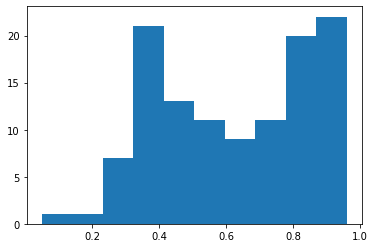

In [22]:
# x1 is the % of investments that go to transmission and distribution
sum_investments_sales_df['pct_poles_and_wires'] = \
    (sum_investments_sales_df['investment_value_transmission'] + \
    sum_investments_sales_df['investment_value_distribution']) / \
    sum_investments_sales_df['sum_investments']
x01_poles_wires_investment_pct = sum_investments_sales_df['pct_poles_and_wires'].reset_index(drop=True)
plt.hist(x01_poles_wires_investment_pct)

__x02__: % of expenditures spent on clean energy

(array([63.,  4., 15., 10.,  6.,  6.,  4.,  3.,  3.,  2.]),
 array([-1.56211400e-04,  8.54506659e-02,  1.71057543e-01,  2.56664421e-01,
         3.42271298e-01,  4.27878175e-01,  5.13485053e-01,  5.99091930e-01,
         6.84698807e-01,  7.70305685e-01,  8.55912562e-01]),
 <BarContainer object of 10 artists>)

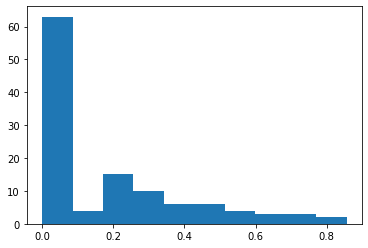

In [23]:
# x2 measures the % of expenitures for "clean" energy (renewables, nuclear, and hydro)
investments_fossil = sum_investments_sales_df['investment_value_steam'] + sum_investments_sales_df['investment_value_other_fossil']
investments_clean = sum_investments_sales_df['investment_value_renewables'] + sum_investments_sales_df['investment_value_nuclear'] + sum_investments_sales_df['investment_value_hydro']
sum_investments_sales_df['pct_renewable_investment'] = np.where(
    sum_investments_sales_df['sum_investments_generation'] != 0,
    investments_clean / sum_investments_sales_df['sum_investments_generation'], 
    0)
x02_renewables_investment_pct = sum_investments_sales_df['pct_renewable_investment'].reset_index(drop=True)
plt.hist(x02_renewables_investment_pct)

__x03__: total investments over sales

(array([ 9., 30., 31., 28., 11.,  3.,  2.,  0.,  1.,  1.]),
 array([  1.06667251,  26.59099713,  52.11532174,  77.63964635,
        103.16397096, 128.68829557, 154.21262018, 179.73694479,
        205.2612694 , 230.78559401, 256.30991862]),
 <BarContainer object of 10 artists>)

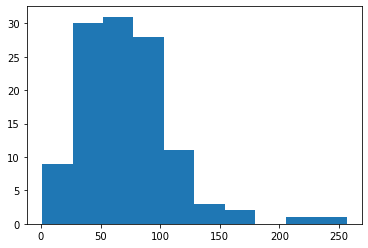

In [24]:
# x3 measures the total investments, divided by sales
sum_investments_sales_df['total_divided_by_sales'] = sum_investments_sales_df['sum_investments']/sum_investments_sales_df['sales']
x03_total_investment_divided_by_sales = sum_investments_sales_df['total_divided_by_sales'].reset_index(drop=True)
x03_total_investment_divided_by_sales[x03_total_investment_divided_by_sales>400] = x03_total_investment_divided_by_sales.median()
plt.hist(x03_total_investment_divided_by_sales)

__x04__: residential / total customers

Note, this is currently done with data from 'housing' and 'customers' columns, but could be done better with the data from customers_sales.csv

In [25]:
customer_names = ['respondent_id', 'housing_units', 'customers']
sum_customers_df = data_after_2010_df[customer_names].groupby(by=["respondent_id"]).sum()
                                      
print(sum_customers_df)

               housing_units   customers
respondent_id                           
2.0               13826176.0  13826176.0
3.0                 157356.0    157356.0
6.0                8929786.0   8929739.0
7.0               11613067.0  11606634.0
8.0                6477428.0   6477428.0
...                      ...         ...
281.0              4471556.0   4670008.0
288.0               918388.0    913536.0
290.0               718213.0    718210.0
403.0               401883.0    401366.0
428.0               603578.0    598805.0

[116 rows x 2 columns]


(array([  1.,   9., 100.,   1.,   1.,   2.,   0.,   0.,   1.,   1.]),
 array([0.86351295, 0.92831288, 0.99311281, 1.05791274, 1.12271267,
        1.18751261, 1.25231254, 1.31711247, 1.3819124 , 1.44671233,
        1.51151226]),
 <BarContainer object of 10 artists>)

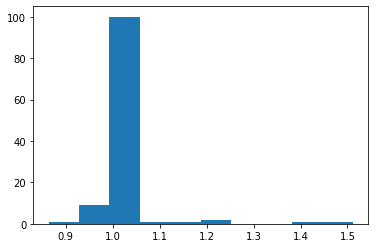

In [26]:
sum_customers_df['residential_ratio'] = sum_customers_df['housing_units']/sum_customers_df['customers']
x04_residential_customer_ratio = sum_customers_df['residential_ratio'].reset_index(drop=True)
plt.hist(x04_residential_customer_ratio)

__x05__: renewable / total generation (mwh)

(array([ 1.,  0.,  0.,  0.,  0., 75., 17., 14.,  1.,  8.]),
 array([-1.24871912, -1.0238472 , -0.79897529, -0.57410338, -0.34923147,
        -0.12435956,  0.10051235,  0.32538427,  0.55025618,  0.77512809,
         1.        ]),
 <BarContainer object of 10 artists>)

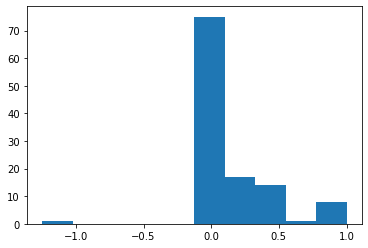

In [27]:
gen_mwh_df['renewable_generation_ratio'] = np.where(
    gen_mwh_df['sum_generation_wo_purchased'] != 0,
    gen_mwh_df['sum_clean_generation'] / gen_mwh_df['sum_generation_wo_purchased'],
    0)
x05_renewable_generation_ratio = gen_mwh_df['renewable_generation_ratio']
plt.hist(x05_renewable_generation_ratio) 

__x06__: nuclear / clean bills ($) <font color=purple>--> deprecated</font>

In [28]:
# x6 measures the ratio of nuclear to clean bills
bills_clean = sum_bills_df['bill_renewables'] + sum_bills_df['bill_nuclear'] + sum_bills_df['bill_hydro']

x06_nuclear_renewable_bill_ratio = sum_bills_df['bill_nuclear']/bills_clean

for index, value in x06_nuclear_renewable_bill_ratio.items():
    v = x06_nuclear_renewable_bill_ratio[index]
    if np.isnan(v):
        x06_nuclear_renewable_bill_ratio[index] = 0

x06_nuclear_renewable_bill_ratio

respondent_id
2.0      0.801151
3.0      0.000000
6.0      0.000000
7.0      0.853058
8.0      0.990068
           ...   
281.0    0.000000
288.0    0.000000
290.0    0.000000
403.0    0.000000
428.0    0.000000
Length: 116, dtype: float64

__x06__: nuclear / clean generation (mwh)

(array([93.,  0.,  2.,  0.,  0.,  0.,  2.,  2.,  1., 16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

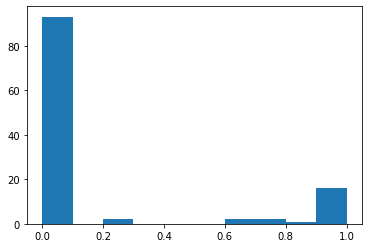

In [29]:
gen_mwh_df['nuclear_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_nuclear'] / gen_mwh_df['sum_clean_generation'],
    0)
x06_nuclear_renewable_mwh_ratio = gen_mwh_df['nuclear_renewable_ratio']
plt.hist(x06_nuclear_renewable_mwh_ratio)

__x07__: hydro / clean bills ($) <font color=purple>--> deprecated</font>

In [30]:
# x07 measures the ratio of hydro to clean bills

x07_hydro_renewable_ratio = sum_bills_df['bill_hydro']/bills_clean

for index, value in x07_hydro_renewable_ratio.items():
    v = x07_hydro_renewable_ratio[index]
    if np.isnan(v):
        x07_hydro_renewable_ratio[index] = 0

x07_hydro_renewable_ratio

respondent_id
2.0      0.194781
3.0      1.000000
6.0      1.000000
7.0     -0.000670
8.0      0.009932
           ...   
281.0    0.000000
288.0    0.000000
290.0    0.000000
403.0    0.000000
428.0    0.000000
Length: 116, dtype: float64

__x07__: hydro / clean generation (mwh)

(array([77.,  7.,  2.,  6.,  1.,  4.,  0.,  0.,  2., 17.]),
 array([-0.09977336,  0.01076953,  0.12131242,  0.23185531,  0.3423982 ,
         0.45294109,  0.56348398,  0.67402687,  0.78456976,  0.89511264,
         1.00565553]),
 <BarContainer object of 10 artists>)

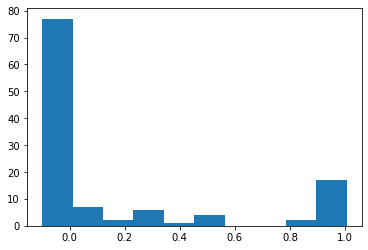

In [31]:
gen_mwh_df['hydro_renewable_ratio'] = np.where(
    gen_mwh_df['sum_clean_generation'] != 0,
    gen_mwh_df['generation_hydro'] / gen_mwh_df['sum_clean_generation'],
    0)
x07_hydro_renewable_mwh_ratio = gen_mwh_df['hydro_renewable_ratio']
plt.hist(x07_hydro_renewable_mwh_ratio)

__x08__: regulatory environment (rps targets)

(array([57., 21., 15.,  6.,  2.,  1.,  4.,  3.,  1.,  6.]),
 array([ 0.        ,  5.09090909, 10.18181818, 15.27272727, 20.36363636,
        25.45454545, 30.54545455, 35.63636364, 40.72727273, 45.81818182,
        50.90909091]),
 <BarContainer object of 10 artists>)

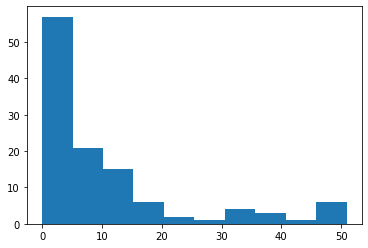

In [32]:
data_from_2020 = data_after_2010_df[data_after_2010_df['year'] == 2020].copy()
data_year_mean = data_after_2010_df.groupby(['respondent_id']).agg({'rps_score': ['mean']}).reset_index(drop=True)
data_year_mean = data_year_mean.droplevel(1, axis=1)
x08_regulatory_rps_target = data_year_mean['rps_score']
plt.hist(x08_regulatory_rps_target)

__c09__: utility type (veritcally integrated, poles and wires only, etc.)

(array([70.,  0.,  0., 31.,  0.,  0., 14.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

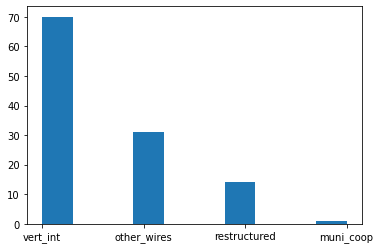

In [33]:
c09_utility_type = utility_info_df['utype']
plt.hist(c09_utility_type)

Consolidate feature variables into model_data table

In [34]:
model_data = pd.DataFrame(
    {
        'target': target, 
        'x01': x01_poles_wires_investment_pct,
        'x02': x02_renewables_investment_pct,
        'x03': x03_total_investment_divided_by_sales,
        'x04': x04_residential_customer_ratio,
        'x05': x05_renewable_generation_ratio,
        'x06': x06_nuclear_renewable_mwh_ratio,
        'x07': x07_hydro_renewable_mwh_ratio,
        'x08': x08_regulatory_rps_target,
        'c09': c09_utility_type,
    }
)
model_data

,target,x01,x02,x03,x04,x05,x06,x07,x08,c09
0,0.019042,0.351208,0.110678,95.893125,1.000000,0.290916,0.778672,0.220809,0.000000,vert_int
1,0.015868,0.513455,0.476233,31.004672,1.000000,0.916615,0.000000,1.000000,0.000000,vert_int
2,0.022832,0.642341,0.039913,54.876484,1.000005,0.024628,0.000000,1.000080,10.487586,vert_int
3,0.012631,0.419923,0.251899,77.037977,1.000554,0.325085,0.963355,0.000000,14.585460,vert_int
4,0.019896,0.610624,0.525933,65.810615,1.000000,0.537077,0.990224,0.009776,0.000000,vert_int
...,...,...,...,...,...,...,...,...,...,...
111,0.024167,0.340022,0.432720,146.585683,0.957505,0.104220,0.000000,0.000000,0.736438,vert_int
112,-0.000717,0.752316,0.272331,43.845785,1.005311,0.019952,0.000000,0.000000,11.250000,vert_int
113,0.018307,0.804942,0.000000,44.646336,1.000004,0.000000,0.000000,0.000000,0.000000,other_wires
114,0.031448,0.712044,0.425716,87.288900,1.001288,0.002061,0.000000,0.000000,0.000000,vert_int


#### Check for covariance

In [35]:
# import seaborn as sns
# sns.pairplot(model_data.drop(columns=['target']))

In [36]:
corr = model_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,target,x01,x02,x03,x04,x05,x06,x07,x08
target,1.000000,-0.477051,0.160433,0.233352,-0.150931,0.201071,0.145987,0.136563,-0.086536
x01,-0.477051,1.000000,-0.334536,-0.441633,0.177967,-0.212036,-0.277082,-0.134305,0.108929
x02,0.160433,-0.334536,1.000000,0.387111,-0.111374,0.682444,0.399664,0.249383,0.323810
x03,0.233352,-0.441633,0.387111,1.000000,-0.053620,0.145790,0.233538,0.047647,0.181448
x04,-0.150931,0.177967,-0.111374,-0.053620,1.000000,-0.017495,-0.083951,-0.034898,0.194726
x05,0.201071,-0.212036,0.682444,0.145790,-0.017495,1.000000,0.385036,0.316093,0.286064
x06,0.145987,-0.277082,0.399664,0.233538,-0.083951,0.385036,1.000000,-0.202189,0.216470
x07,0.136563,-0.134305,0.249383,0.047647,-0.034898,0.316093,-0.202189,1.000000,0.217405
x08,-0.086536,0.108929,0.323810,0.181448,0.194726,0.286064,0.216470,0.217405,1.000000


#### Save model_data file

In [37]:
output_dir = os.path.join('..', 'data', 'processed')

In [38]:
model_data.to_csv(os.path.join(output_dir, 'model_data.csv'), index=False)